## This is the logistic vs KNearestNeighbours model and there predictoin

In [1]:
import pandas as pd
import sklearn
import matplotlib

In [39]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [5]:
df=pd.read_csv("Diabetes.csv")
df

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [7]:
df.head(20)

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [9]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [11]:
df.shape

(768, 9)

<Axes: title={'center': 'Mising values in percentage'}, ylabel='percentage'>

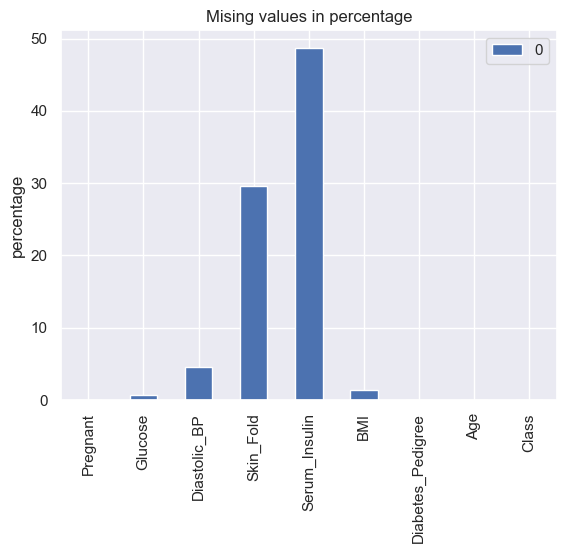

In [13]:
import seaborn as sns
sns.set()
import matplotlib as plot
miss_val_per = pd.DataFrame(df.isnull().sum()/len(df)*100)
miss_val_per.plot(kind='bar',title='Mising values in percentage',ylabel='percentage')

## Using AKNeighbourRegressor

In [15]:
model1 = KNeighborsRegressor()

In [17]:
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = knn_imputer.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
df_imputed

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,35.2,134.2,30.1,0.349,47.0,1.0


In [19]:
df_imputed.isnull().sum()

Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64

In [21]:
X = df_imputed.iloc[:, :-1]  
Y = df_imputed.iloc[:, -1]

In [23]:
X

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,165.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,35.2,134.2,30.1,0.349,47.0


In [25]:
Y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Class, Length: 768, dtype: float64

In [27]:
X.isnull().sum()

Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
dtype: int64

In [176]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.2,random_state=42)

In [178]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [180]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [182]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'KNN Classification Accuracy: {accuracy:.2f}')

KNN Classification Accuracy: 0.70


## Using logistic regression

In [90]:
dff=pd.read_csv("Diabetes.csv")
dff

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [156]:
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

In [158]:
dff

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age
0,6.0,148.0,72.0,35.0,0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0
2,8.0,183.0,64.0,25.8,0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,0,26.2,0.245,30.0
766,1.0,126.0,60.0,35.2,0,30.1,0.349,47.0


In [160]:
dff.isnull().sum()

Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
dtype: int64

In [162]:
model2 =  LogisticRegression(max_iter=1000) 

In [170]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)

In [172]:
model2.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [174]:
y_pred = model2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Classification Accuracy: {accuracy:.2f}')

KNN Classification Accuracy: 0.77
